# Supervised Learning Example 1
- Predict life satisfaction from GDP (Regression algorithm)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [18]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Data Preparation

In [3]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

In [5]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [16]:
lifesat.shape

(27, 3)

In [12]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [13]:
type(X)

numpy.ndarray

In [15]:
X.shape  # n-rows and 1-column

(27, 1)

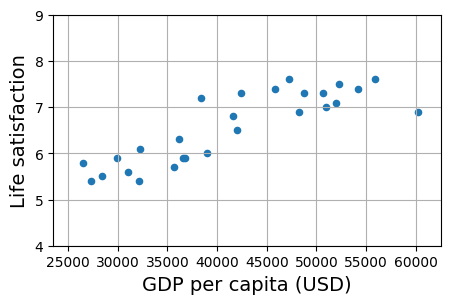

In [74]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction",
             figsize=(5, 3))
plt.axis([23_500, 62_500, 4, 9])
plt.show()

## Model Design
- Using LinearRegression (Model-based approach)

In [23]:
# Select a linear model
model = LinearRegression()

## Training

In [24]:
model.fit(X, y)

LinearRegression()

## Evaluation

### Test with new data

In [71]:
X_new = [[37_655.2]]
y_new = model.predict(X_new)
print('Predicted Life Satisfaction:', y_new.squeeze())

Predicted Life Satisfaction: 6.301657665080485


### Visualize the result

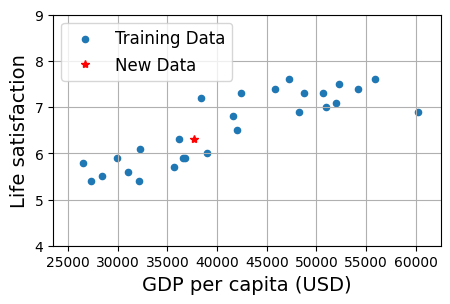

In [79]:
# Show the data points
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction",
             figsize=(5, 3), label='Training Data')

# Show the new predicted point on the plot
plt.plot(X_new, y_new, 'r*', label='New Data')

plt.axis([23_500, 62_500, 4, 9])
plt.legend()
plt.show()

### Show the predicted line

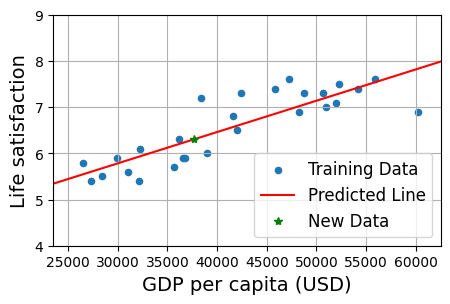

In [80]:
# Create two points of GDP values and their predictions
Xs = np.array([[23_500, 62_500]]).reshape(-1, 1) # reshape to n-rows and 1-column
ys = model.predict(Xs)

lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction",
             figsize=(5, 3), label='Training Data')
plt.plot(Xs, ys, 'r-', label='Predicted Line')  # Plot the predicted line
plt.plot(X_new, y_new, 'g*', label='New Data')  # Plot the new predicted point

plt.axis([23_500, 62_500, 4, 9])
plt.legend()
plt.show()


## Another Model
- using K-Nearest Neighbors Regression (Instance-based approach)

In [41]:
model_knn = KNeighborsRegressor(n_neighbors=3)

In [42]:
model_knn.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [70]:
X_new = [[37_655.2]]
y_new = model_knn.predict(X_new)
print('Predicted Life Satisfaction:', y_new.squeeze())

Predicted Life Satisfaction: 6.333333333333333


<Figure size 500x300 with 0 Axes>

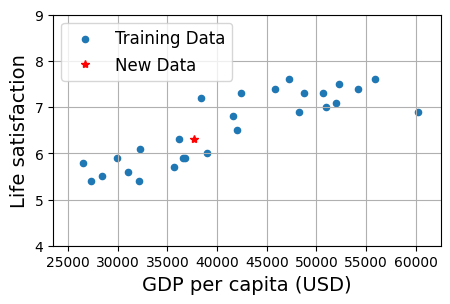

In [78]:
plt.figure(figsize=(5, 3))

lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction",
             figsize=(5, 3), label='Training Data')
plt.plot(X_new, y_new, 'r*', label='New Data')

plt.axis([23_500, 62_500, 4, 9])
plt.legend()
plt.show()